# **Problem Statement - Air Quality Index Prediction (Predict AQI category using environmental sensor data.)**

In [ ]:
#Import necessary libraries for AQI prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

Dataset link - https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india

In [ ]:
#Load the dataset
data = pd.read_csv('/content/city_day.csv')

In [ ]:
#View the dataset
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


Data Preprocessing

In [ ]:
#Removing unnecessary colmns
data.drop(['City','Date'],axis=1,inplace=True)
data.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
# Checking features or columns of the dataset
data.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
# Using info() function for basics information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       24933 non-null  float64
 1   PM10        18391 non-null  float64
 2   NO          25949 non-null  float64
 3   NO2         25946 non-null  float64
 4   NOx         25346 non-null  float64
 5   NH3         19203 non-null  float64
 6   CO          27472 non-null  float64
 7   SO2         25677 non-null  float64
 8   O3          25509 non-null  float64
 9   Benzene     23908 non-null  float64
 10  Toluene     21490 non-null  float64
 11  Xylene      11422 non-null  float64
 12  AQI         24850 non-null  float64
 13  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [ ]:
#Check the dataset shape
data.shape

(29531, 14)

In [ ]:
#Checking missing values
data.isnull().sum()

,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854
O3,4022
Benzene,5623


In [ ]:
#Removing missing values
'''
AQI is computed for each pollutant individually, and the highest sub-index becomes the overall AQI.
That why we replace missing values with 0
'''
data = data.fillna(0)

In [ ]:
# Statistical Analysis
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,56.948470,73.565932,15.442981,25.093456,27.730420,15.270502,2.091818,12.635454,29.793840,2.656135,6.331783,1.187464,140.077207
std,64.250908,91.600663,22.116463,24.764871,31.408837,23.545304,6.740126,17.603451,23.377948,14.284564,17.469547,4.207094,142.666957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.390000,0.000000,3.670000,9.100000,6.530000,0.000000,0.400000,4.240000,12.795000,0.000000,0.000000,0.000000,61.000000
50%,40.890000,49.000000,8.690000,18.580000,19.700000,7.910000,0.840000,7.930000,27.060000,0.470000,1.090000,0.000000,103.000000
75%,72.450000,111.880000,17.570000,34.665000,36.015000,21.755000,1.380000,13.810000,42.730000,2.420000,6.020000,0.430000,179.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
# Calculate AQI and AQI_Bucket
def aqi_calculation(row):

  breakpoints = {
        'PM2.5': [[0, 30], [31, 60], [61, 90], [91, 120], [121, 250]],
        'PM10': [[0, 50], [51, 100], [101, 250], [251, 350], [351, 430]],
        'SO2': [[0, 40], [41, 80], [81, 380], [381, 800], [801, 1600]],
        'NO2': [[0, 40], [41, 80], [81, 380], [381, 800], [801, 1600]],
        'CO': [[0, 1], [1.1, 2], [2.1, 10], [10.1, 15], [15.1, 20]],
        'O3': [[0, 50], [51, 100], [101, 168], [169, 208], [209, 748]]
    }

  aqi_categories = ['Good', 'Satisfactory', 'Moderately polluted', 'Poor', 'Very poor', 'Severe']

  pollutant_aqis = {}
  for pollutant in breakpoints:
      concentration = row[pollutant]
      if pd.notna(concentration):
          for i, (lower, upper) in enumerate(breakpoints[pollutant]):
              if lower <= concentration <= upper:
                  aqi = ((i + 1) * 50 - i * 50) / (upper - lower) * (concentration - lower) + i * 50
                  pollutant_aqis[pollutant] = aqi
                  break

  if pollutant_aqis:
        aqi = max(pollutant_aqis.values())
        aqi_category = aqi_categories[int(aqi // 50)] if aqi <= 300 else aqi_categories[-1]
        return aqi, aqi_category
  else:
      return None, None

# updating the dataset
data[['AQI', 'AQI_Bucket']] = data.apply(aqi_calculation, axis=1, result_type='expand')



In [ ]:
data.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0.0,0.0,0.92,18.22,17.15,0.0,0.92,27.64,133.36,0.00,0.02,0.00,124.149254,Moderately polluted
1,0.0,0.0,0.97,15.69,16.46,0.0,0.97,24.55,34.06,3.68,5.50,3.77,48.500000,Good
2,0.0,0.0,17.40,19.30,29.70,0.0,17.40,29.07,30.70,6.80,16.40,2.25,223.469388,Very poor
3,0.0,0.0,1.70,18.48,17.97,0.0,1.70,18.59,36.08,4.43,10.14,1.00,83.333333,Satisfactory
4,0.0,0.0,22.10,21.42,37.76,0.0,22.10,39.33,39.31,7.01,18.89,2.78,49.162500,Good


Dataset visualization

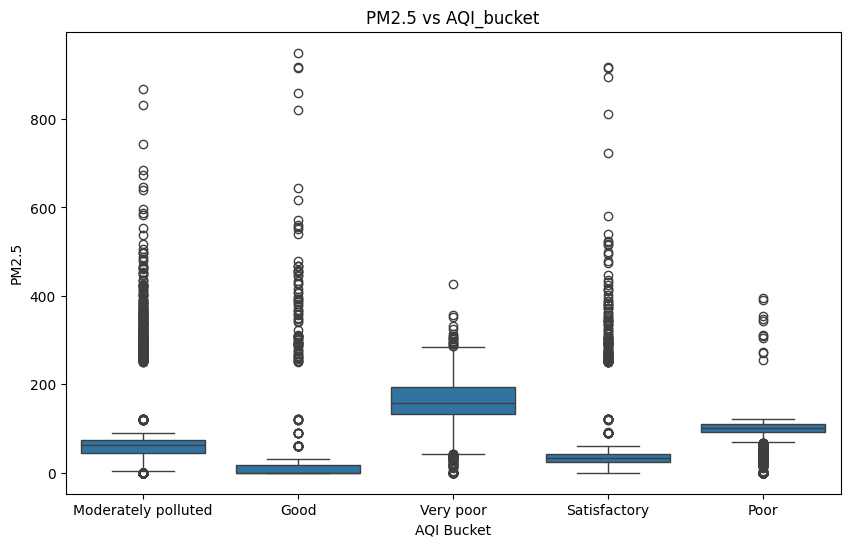

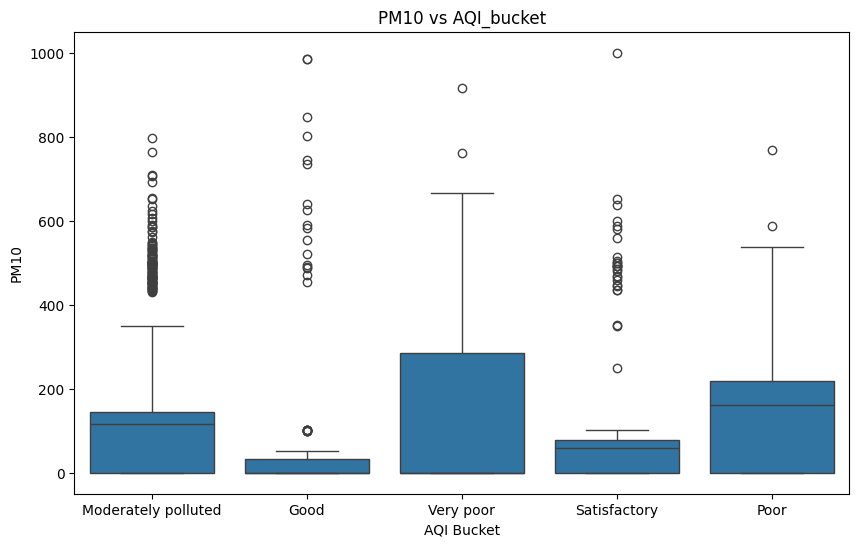

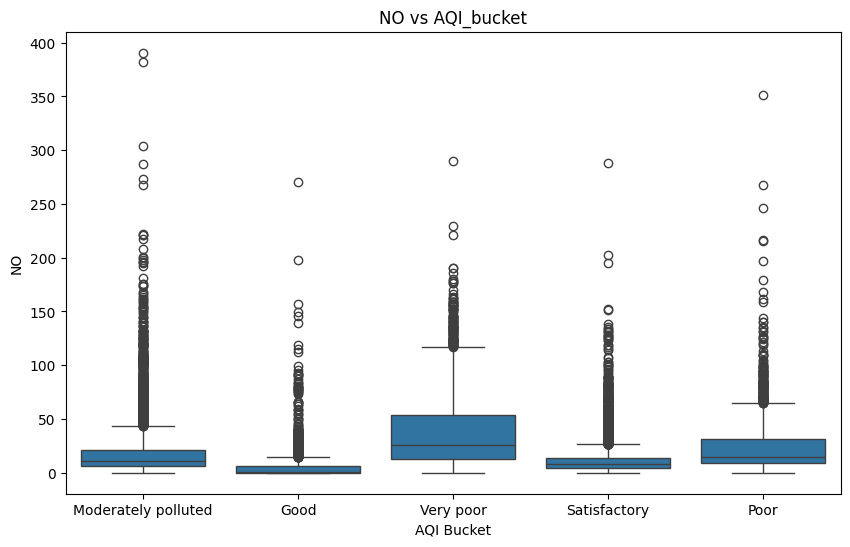

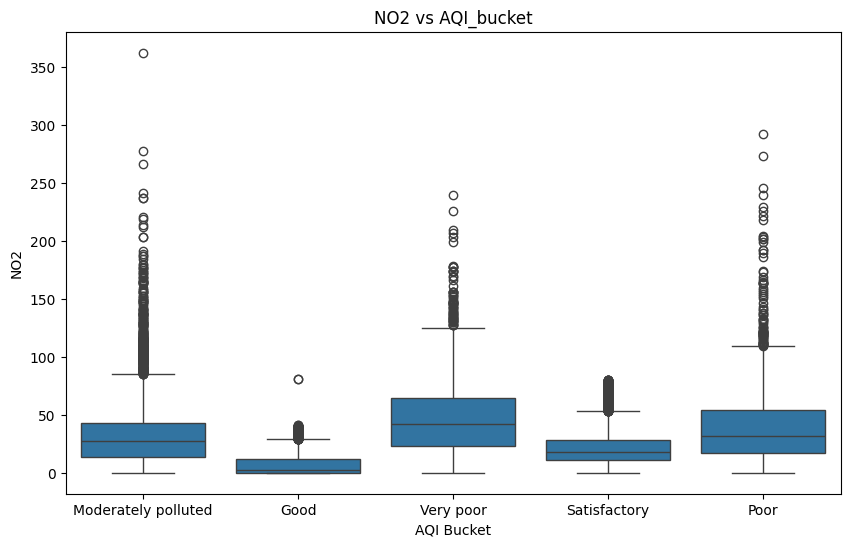

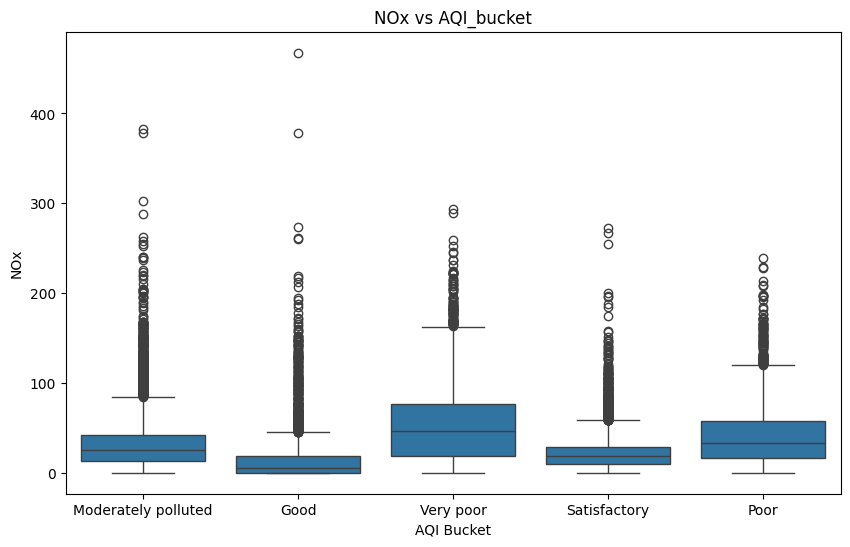

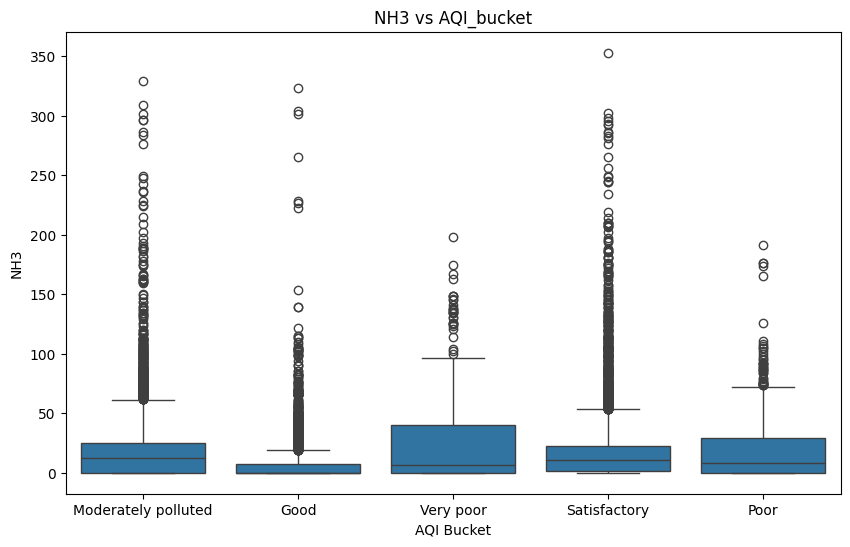

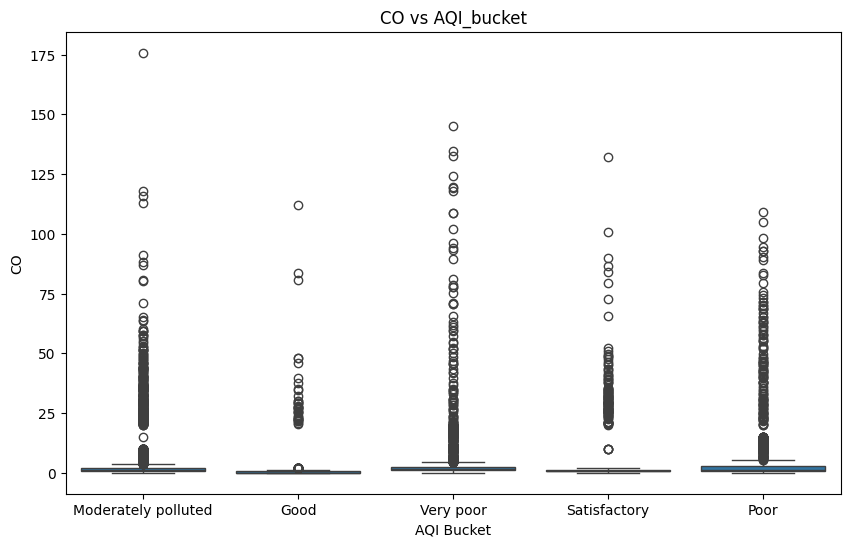

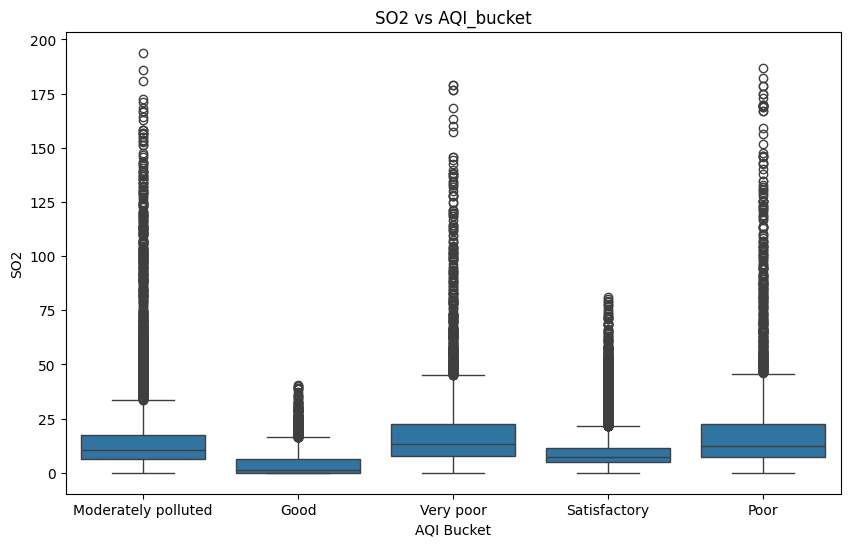

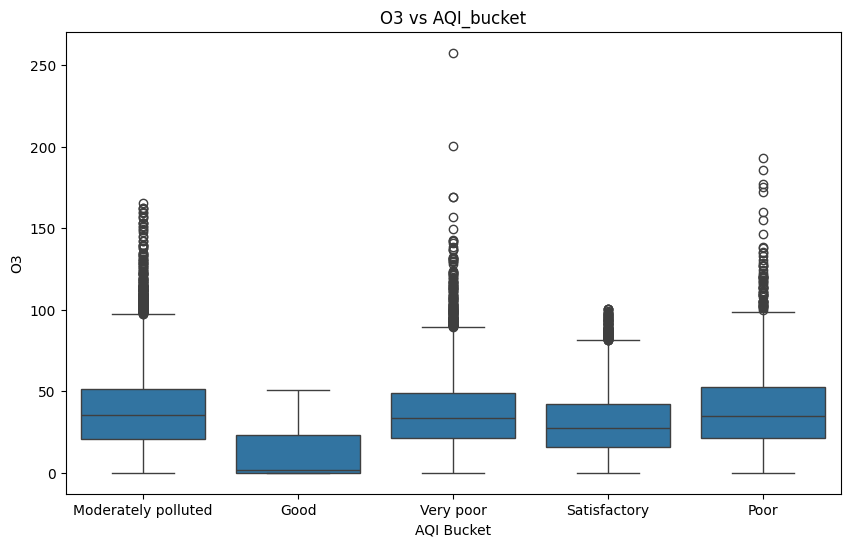

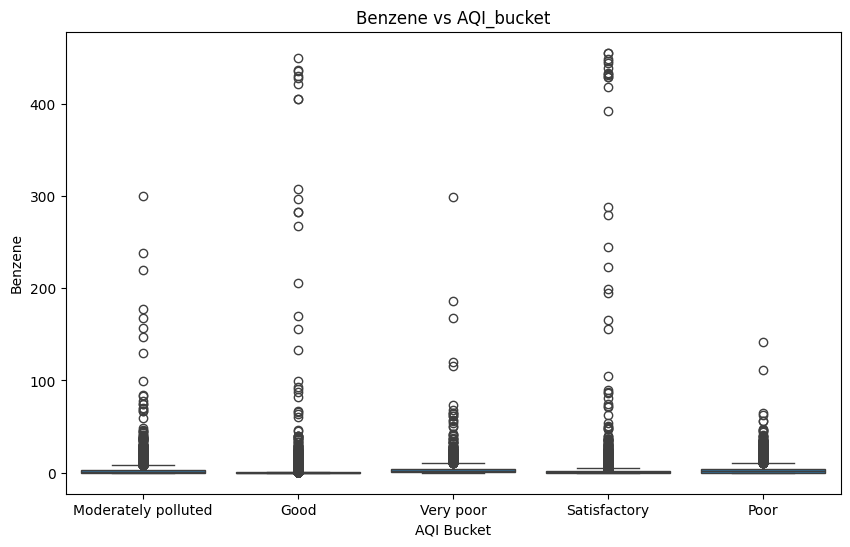

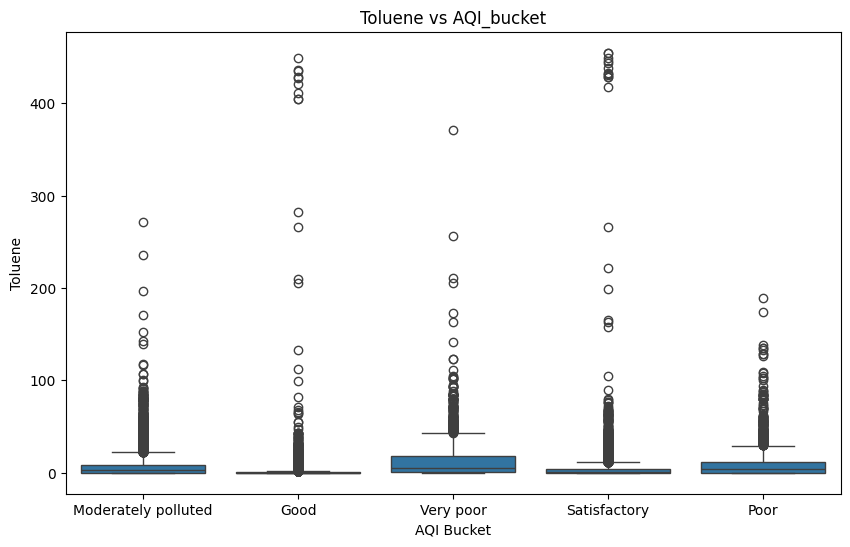

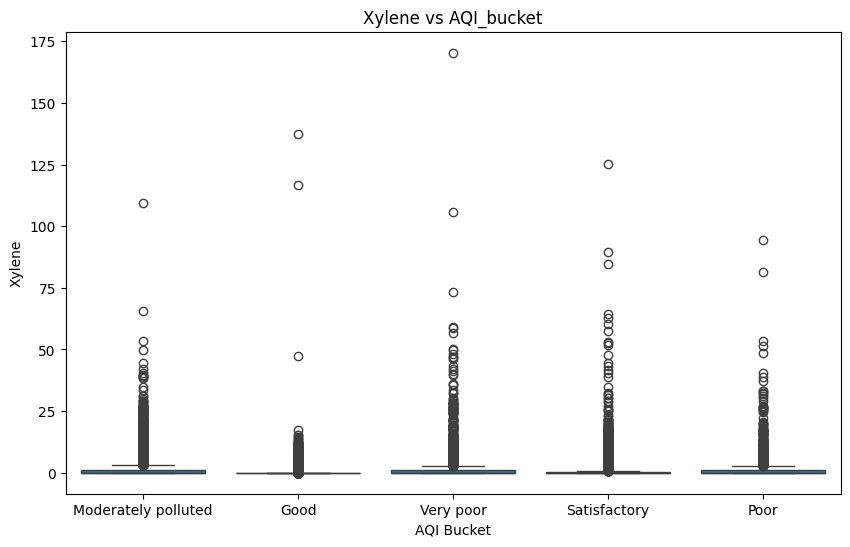

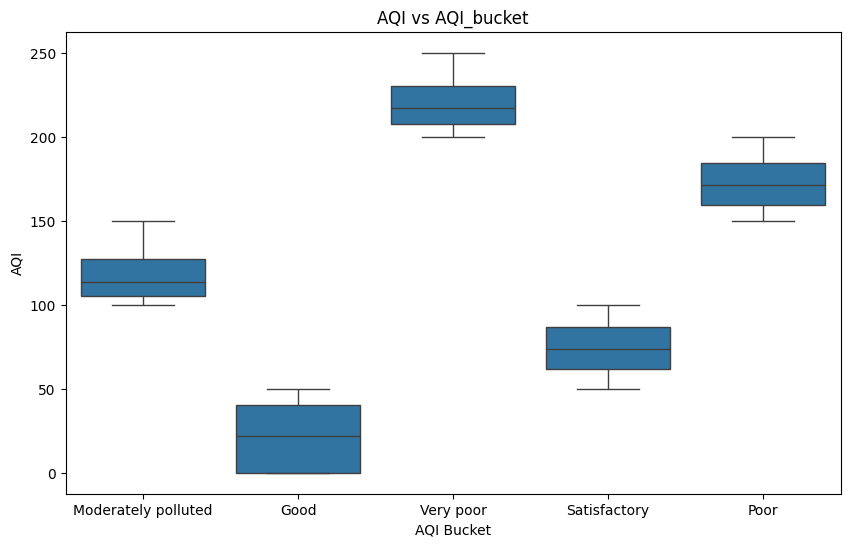

In [ ]:
numerical_features = data.select_dtypes(include=np.number).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='AQI_Bucket', y=feature, data=data)
    plt.title(f'{feature} vs AQI_bucket')
    plt.xlabel('AQI Bucket')
    plt.ylabel(feature)
    plt.show()

Feature Engineering

In [ ]:
#Feature Selection
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3']

In [ ]:
# Here we represent the independent variable as 'X' & dependent variable as 'Y'
X = data[features]
Y = data['AQI_Bucket']

In [ ]:
#Standardization of features
from sklearn.preprocessing import StandardScaler
SD = StandardScaler()
X = SD.fit_transform(X)

In [ ]:
#Creating Label for AQI_Bucket
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y = LE.fit_transform(Y)
original_label = LE.classes_

In [ ]:
#Breaking dataset into Training and Testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1,test_size=0.2)

In [ ]:
#Shape of X,X_train & X_test
print(X.shape,X_train.shape,X_test.shape)

(29531, 8) (23624, 8) (5907, 8)


In [ ]:
#Shape of Y,Y_train & Y_test
print(Y.shape,Y_train.shape,Y_test.shape)

(29531,) (23624,) (5907,)


Model Selection - Decision Tree



In [ ]:
#Import Decision Tree classifier Model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Load Model
Model = DecisionTreeClassifier(criterion='gini',random_state=1)

In [ ]:
#Trainig the model
Model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

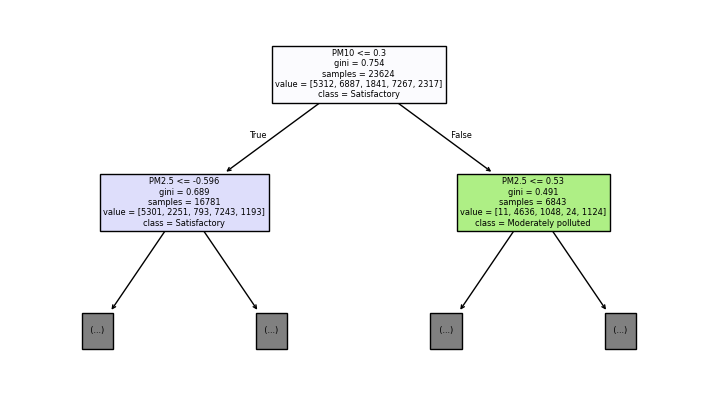

In [ ]:
#Model Visualize
from sklearn import tree
import matplotlib.pyplot as plt # Ensure matplotlib is imported
import numpy as np

plt.figure(figsize=(9,5))
# Convert numpy array to list of strings for class_names
class_names_str = [str(label) for label in original_label]
tree.plot_tree(Model, filled=True, max_depth=1, feature_names=features, class_names=class_names_str)
plt.show()

Model Evaluation

In [ ]:
# Now we Testining the model
Y_pred = Model.predict(X_test)
print(Y_pred)

[4 1 3 ... 3 3 2]


In [ ]:
#Import & calculate the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_pred,Y_test)
print(f'Accuracy Score = {accuracy}')

Accuracy Score = 0.9920433384120535


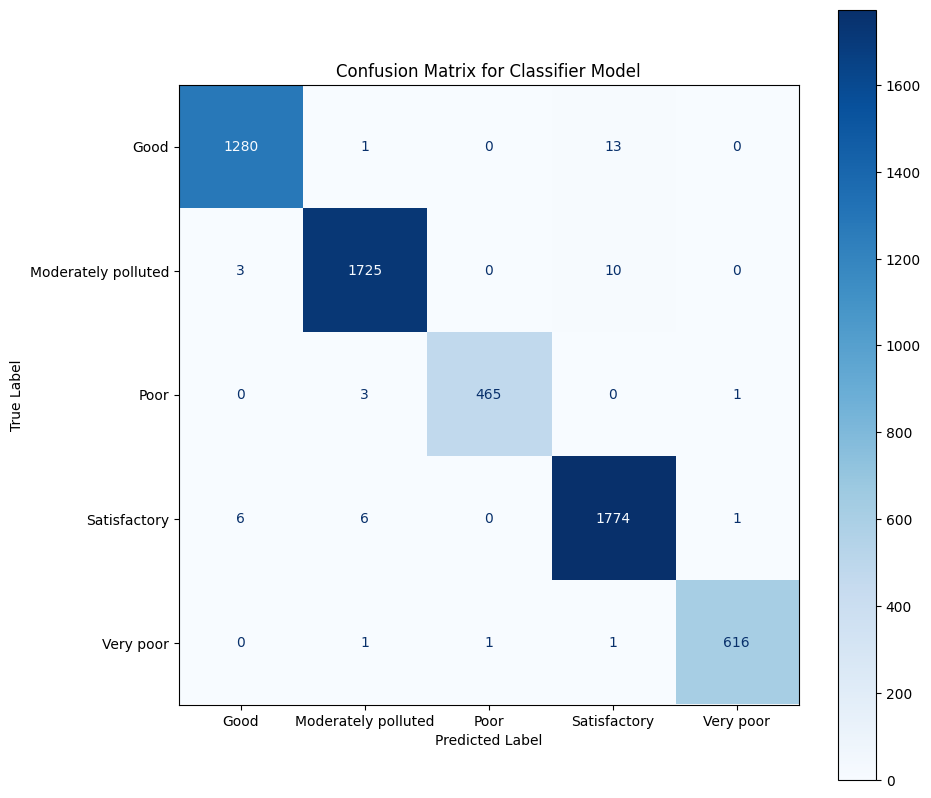

In [ ]:
## Plotting the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)

# Get the class labels (original string labels)
class_labels = original_label

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Classifier Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#Precision score & Recall Score calculation
from sklearn.metrics import precision_score,recall_score

# Calculate the precision score
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test,Y_pred, average='weighted')
print(f'Precision Score = {precision}')
print(f'Recall Score = {recall}')

Precision Score = 0.9920585021503457
Recall Score = 0.9920433384120535


Creating final model for development

In [ ]:
# Loading the model
AQI_classifier_model = DecisionTreeClassifier(criterion='gini',random_state=1)

In [ ]:
# Training the model
AQI_classifier_model.fit(X,Y)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Input Function
def user_input_func():
    features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3']
    input_values = []

    for feature in features:
        while True:
            try:
                value = float(input(f"Enter the value for {feature}: "))
                input_values.append(value)
                break
            except ValueError:
                print("Please enter a valid input.")

    return np.array(input_values)

# Get input from user
user_input = user_input_func()
reshape_user_input = user_input.reshape(1, -1)

# Standardize input
user_input_SD = SD.transform(reshape_user_input)

# Predict using trained model
prediction = AQI_classifier_model.predict(user_input_SD)
AQI_class = LE.inverse_transform(prediction)

# Print output
print(f"\nPrediction: {prediction[0]}")
print(f"Predicted AQI Category: {AQI_class[0]}")


Enter the value for PM2.5: 0
Enter the value for PM10: 0
Enter the value for NO: 0
Enter the value for NO2: 0
Enter the value for NOx: 0
Enter the value for CO: 0
Enter the value for SO2: 0
Enter the value for O3: 133.36

Prediction: 1
Predicted AQI Category: Moderately polluted


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = 'AQI_Bucket_classifier'
pickle.dump(AQI_classifier_model,open(filename,'wb'))

In [ ]:
input_data = (0,0,0,0,0,0,0,133.36)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

prediction = AQI_classifier_model.predict(input_data_reshaped)

load_model = pickle.load(open('/content/AQI_Bucket_classifier','rb'))

prediction = load_model.predict(input_data_reshaped)
AQI_class = LE.inverse_transform(prediction)

print(prediction)
print(AQI_class)

[1]
['Moderately polluted']


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


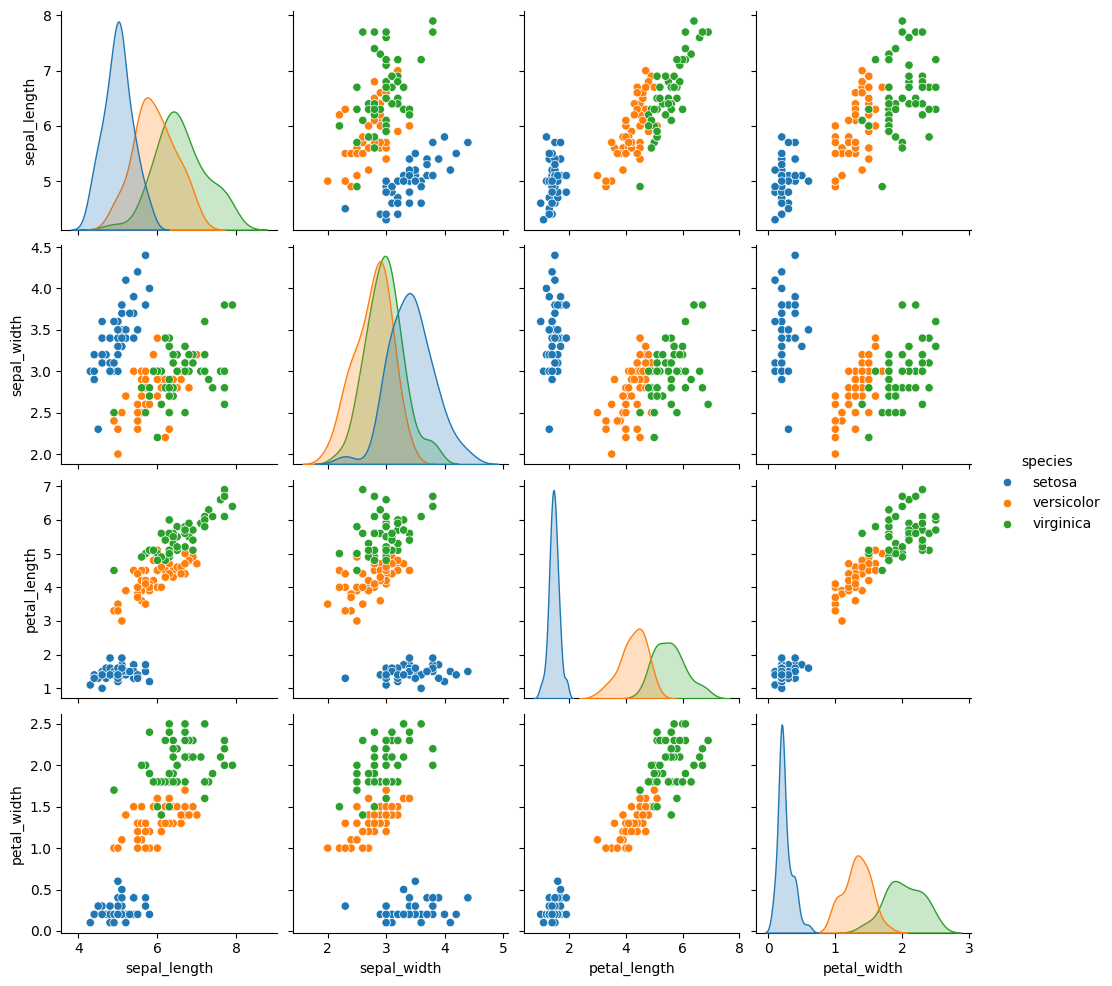

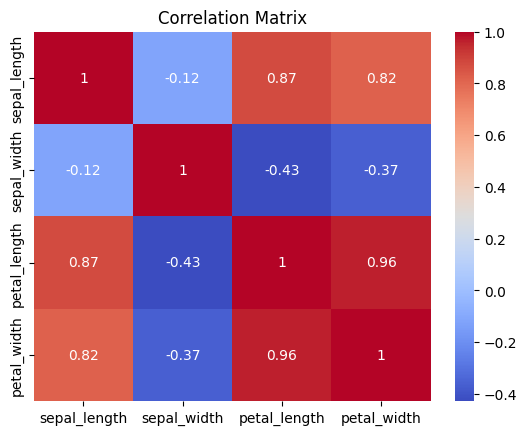

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load Iris Dataset
iris = sns.load_dataset("iris")
print(iris.head())

# Pairplot (Multivariate)
sns.pairplot(iris, hue='species')
plt.show()

# Heatmap of correlation matrix
corr = iris.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



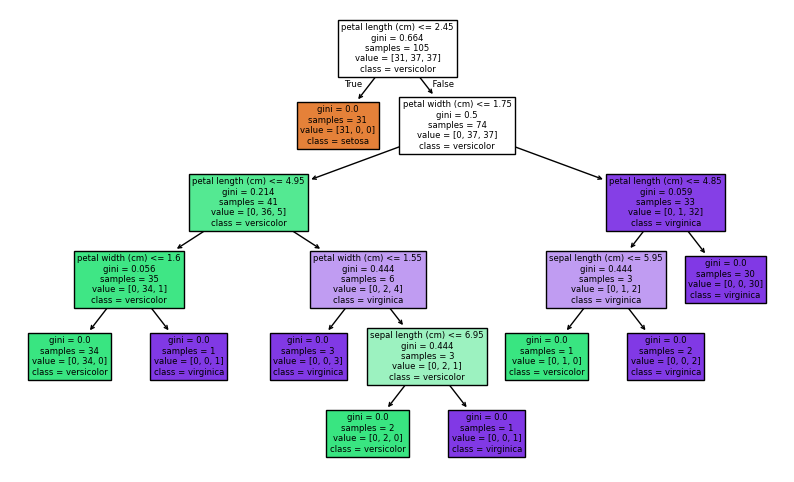

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize Tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


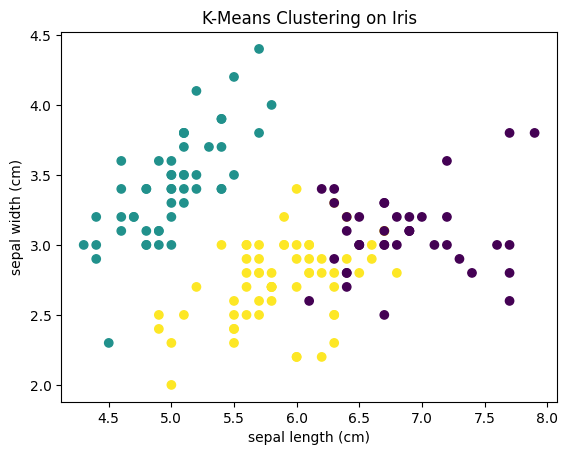

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = iris.data
df = pd.DataFrame(X, columns=iris.feature_names)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Add cluster labels
df['cluster'] = kmeans.labels_

# Plot clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Means Clustering on Iris")
plt.show()


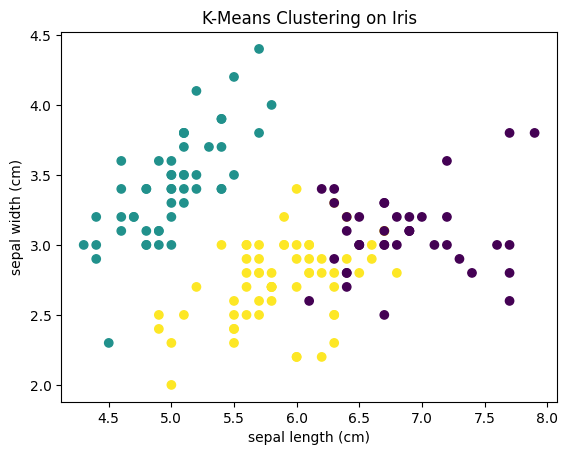

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = iris.data
df = pd.DataFrame(X, columns=iris.feature_names)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Add cluster labels
df['cluster'] = kmeans.labels_

# Plot clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Means Clustering on Iris")
plt.show()
